In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns

########################################### Regresión líneal ##########################################################

In [2]:
class regresionLineal:
    def __init__(self, x_data, y_data, tno_data):
        self.xd = x_data
        self.yd = y_data
        self.tnod = tno_data
        self.y_estimado = None
    
    def ajuste(self):
        #Concatenación de unos a variables independientes (Intersepto)
        X_ = np.c_[np.ones((self.tnod,1)),self.xd]
        #Cálculo de valores óptimos para la regresión lineal
        valores_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(self.yd)
        #Multiplicación de matrices para obtener los valores dependientes estimados
        self.y_estimado = np.dot(X_, valores_opt)
    
    def graficos(self):
        #Gráfico de dispersión 
        fig, ax = plt.subplots()
        ax.set_title('Regresión lineal', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
        ax.set_xlabel("x", fontdict = {'fontsize':14, 'fontweight':'bold'})
        ax.set_ylabel("y", fontdict = {'fontsize':14, 'fontweight':'bold'}, rotation=0)
        ax.scatter(self.xd, self.yd, alpha = 0.5, color="r")
        plt.show()
        
        # Gráfico de dispersión con recta óptima
        fig, ax = plt.subplots()
        ax.set_title('Regresión lineal', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
        ax.set_xlabel("x", fontdict = {'fontsize':14, 'fontweight':'bold'})
        ax.set_ylabel("y", fontdict = {'fontsize':14, 'fontweight':'bold'}, rotation=0)
        ax.scatter(self.xd, self.yd, alpha = 0.5, color="r")
        plt.plot(self.xd, self.y_estimado)
        plt.show()
    
    def iniciarCalculos(self):
        self.ajuste()
        self.graficos()

In [3]:
#Distribucíon uniforme entre 0 y 3 con 1000 variables independientes
x = np.random.uniform(0,3,1000)

In [4]:
#Distribucíon uniforme entre 2 y 4 con 1000 flot
dis_uni = np.random.uniform(2,4,1000)

In [5]:
#Obtención de variables dependientes
y = 5 + (2*x) + dis_uni

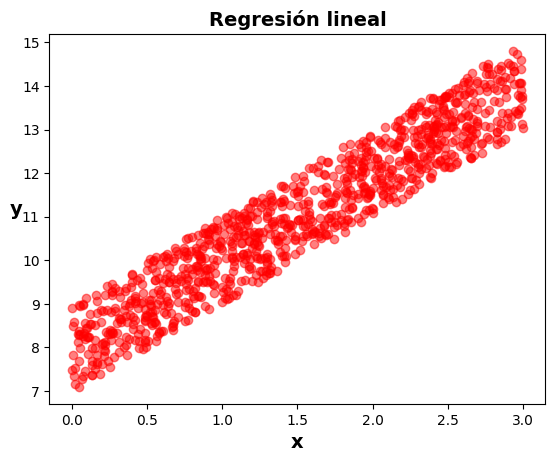

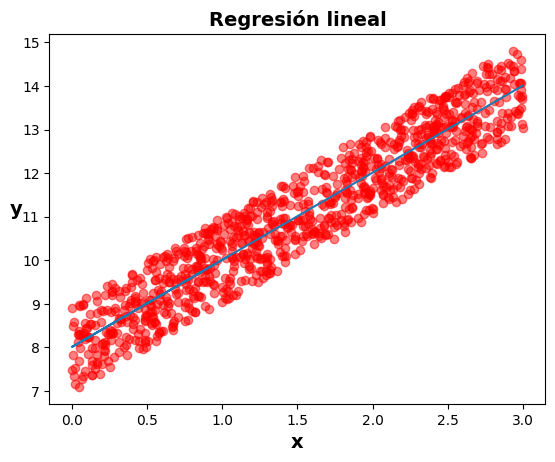

In [6]:
c_regresion = regresionLineal(x, y, 1000)
c_regresion.iniciarCalculos()

################################################## Regresión Polinominal ##############################################

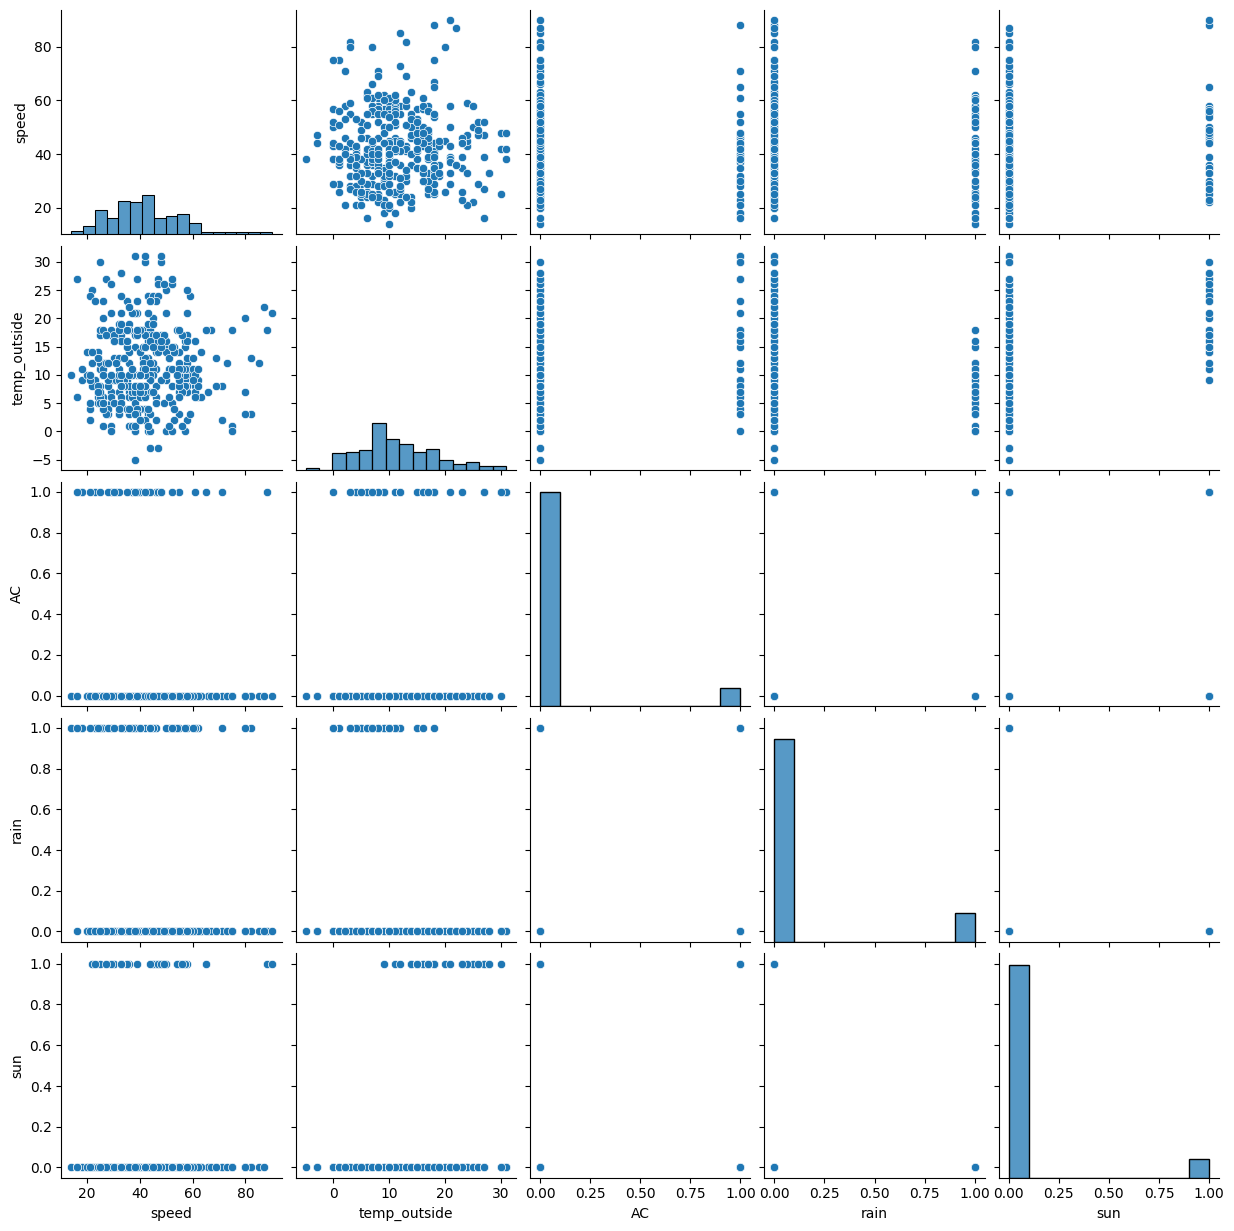

C:\Users\Jose\AppData\Local\Temp\ipykernel_4424\3672472958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_y["distance"] = df_x_y["distance"].apply(lambda x: x.replace(",","."))
C:\Users\Jose\AppData\Local\Temp\ipykernel_4424\3672472958.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_y["consume"] = df_x_y["consume"].apply(lambda x: x.replace(",","."))
C:\Users\Jose\AppData\Local\Temp\ipykernel_4424\3672472958.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

   Grado       ECM
0      1  1.082401
1      2  1.159493
2      3  1.239030
3      4  1.317488
4      5  1.391623
5      6  1.428284


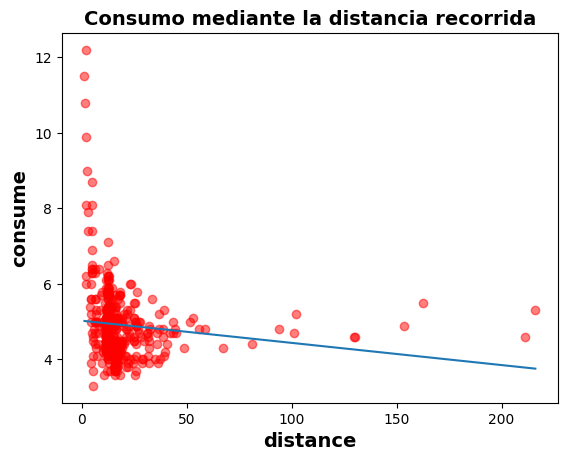

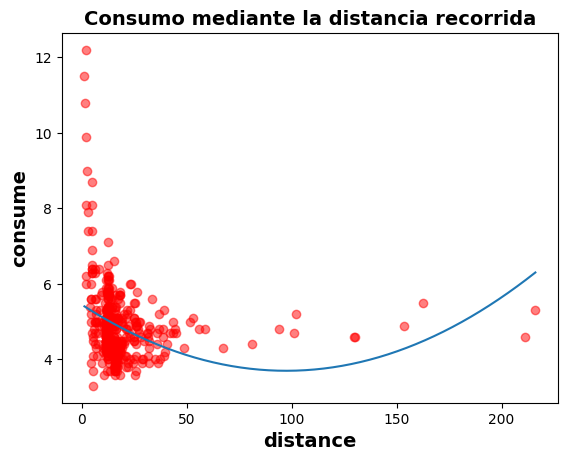

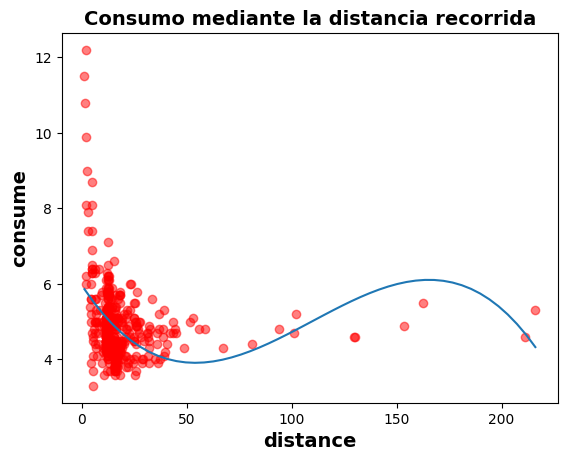

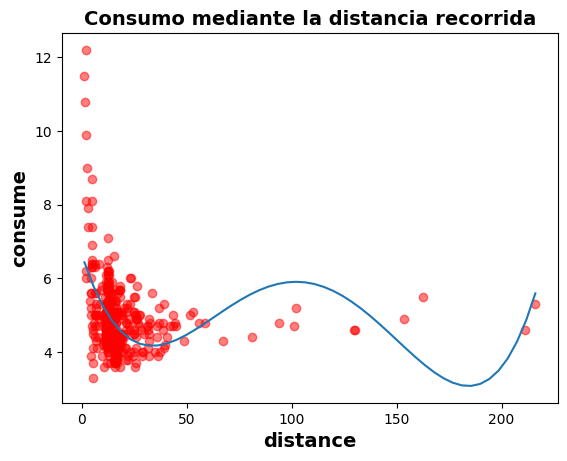

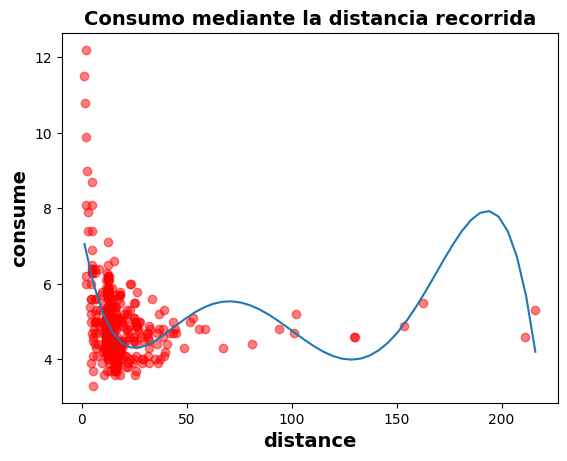

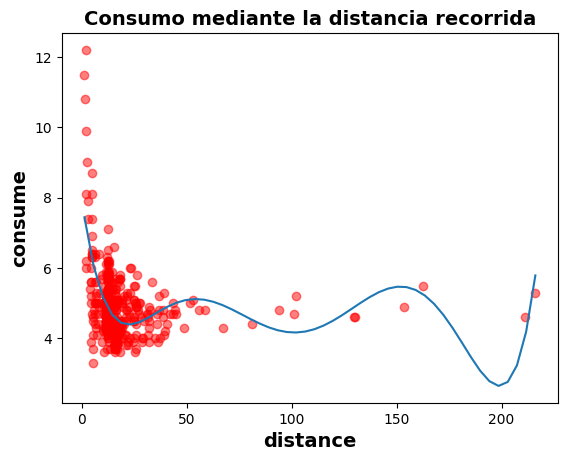

In [7]:
# Exportación de datos a dataframe pandas
df = pd.read_csv("measurements.csv", encoding="utf-8", sep=",")

#Visualización de datos de csv en seaborn
sns.pairplot(df)
plt.show()

# Dataframe auxiliar para trabajar las variables distance y consume en regresión lineal
df_x_y = df[["distance","consume"]]

# Reemplazo de comas por puntos
df_x_y["distance"] = df_x_y["distance"].apply(lambda x: x.replace(",","."))
df_x_y["consume"] = df_x_y["consume"].apply(lambda x: x.replace(",","."))

# Cambio de tipo de dato de string a float
df_x_y["distance"] = df_x_y["distance"].astype("float")
df_x_y["consume"] = df_x_y["consume"].astype("float")

# Se pasa como series los datos
x_df = df_x_y[["distance"]]
y_df = df_x_y[["consume"]]

grados=[1,2,3,4,5,6]
data = []
for gr in grados:
    # Transformación polinomial
    polinomio = PolynomialFeatures(degree=gr)
    X_ = polinomio.fit_transform(x_df.values)

    # Cálculo de valores óptimos para la regresión lineal
    valores_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y_df.values)

    # Multiplicación de matrices para obtener los valores dependientes estimados
    y_estimado = np.dot(X_, valores_opt)

    # Calcular el Error Cuadrático Medio, al aumentar el grado mayor es el error
    ecm = np.mean((y_df.values - y_estimado.flatten())**2)
      
    data.append([gr,ecm])

    # Gráfico de dispersión con recta óptima
    x_line = np.linspace(x_df.min(), x_df.max()).reshape(-1, 1) # Conjunto de valores de x ordenados
    X_line = polinomio.transform(x_line)  # Se transforma a polinómica
    y_line = np.dot(X_line, valores_opt)  # Se estima valores de y

    fig, ax = plt.subplots()
    ax.set_title('Consumo mediante la distancia recorrida', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
    ax.set_xlabel("distance", fontdict = {'fontsize':14, 'fontweight':'bold'})
    ax.set_ylabel("consume", fontdict = {'fontsize':14, 'fontweight':'bold'})
    ax.scatter(x_df.values, y_df.values, alpha = 0.5, color="r")
    plt.plot(x_line, y_line)
    plt.savefig(f"Grado-{gr}.jpg")

# Tabala de ECM
df_ECM = pd.DataFrame(data, columns=["Grado", "ECM"])
print(df_ECM)

################################################# Regresión con penalización ##############################################

In [8]:
train, test = train_test_split(df_x_y, test_size = 0.20)

x_train = train[["distance"]]
y_train = train[["consume"]]

# Transformación polinomial
polinomio = PolynomialFeatures(degree=6)
X_ = polinomio.fit_transform(x_train)

######################################### Ridge #################################################

Coeficientes Ridge: [[ 0.00000000e+00 -4.73225203e-01  2.07936252e-02 -3.97226728e-04
   3.65080161e-06 -1.58138317e-08  2.58043330e-11]]
Intercepto Ridge: [8.18612942]
Error Cuadrático Medio Ridge = 0.6802735188464405


C:\Users\Jose\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.17489e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Jose\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


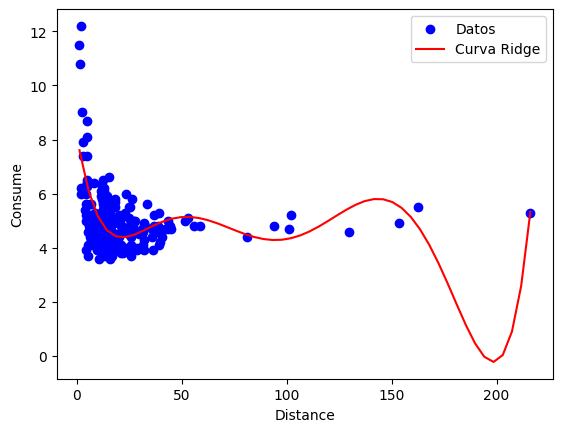

In [9]:
# Ajuste de la regresión Ridge
ridge = Ridge(alpha=1.0)  # 'alpha' es el parámetro de regularización
ridge.fit(X_, y_train)

# Coeficientes estimados
valores_opt_ridge = ridge.coef_
intercepto_ridge = ridge.intercept_

print(f"Coeficientes Ridge: {valores_opt_ridge}")
print(f"Intercepto Ridge: {intercepto_ridge}")

# Estimación de los valores dependientes utilizando el modelo ajustado
y_estimado_ridge = ridge.predict(X_)

# Cálculo del Error Cuadrático Medio
ecm_ridge = np.mean((y_train.values - y_estimado_ridge)**2)
print(f"Error Cuadrático Medio Ridge = {ecm_ridge}")

# Gráfico de dispersión y curva ajustada
x_line = np.linspace(x_train.min(), x_train.max()).reshape(-1, 1)
X_line = polinomio.transform(x_line)  # Transformación polinómica de los valores
y_line_ridge = ridge.predict(X_line)  # Predicción de los valores para la recta ajustada

# Gráfico
plt.scatter(x_train, y_train, color="blue", label="Datos")
plt.plot(x_line, y_line_ridge, color="red", label="Curva Ridge")
plt.xlabel("Distance")
plt.ylabel("Consume")
plt.legend()
plt.show()


#################################### Lasso #######################################################

C:\Users\Jose\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+02, tolerance: 3.325e-02
  model = cd_fast.enet_coordinate_descent(


Coeficientes Lasso: [ 0.00000000e+00 -1.06540181e-01  1.80505375e-03 -8.30674480e-06
 -3.01581885e-09  3.25724533e-11  1.28237126e-13]
Intercepto Lasso: [6.0952492]
Error Cuadrático Medio Lasso = 1.225685247773508


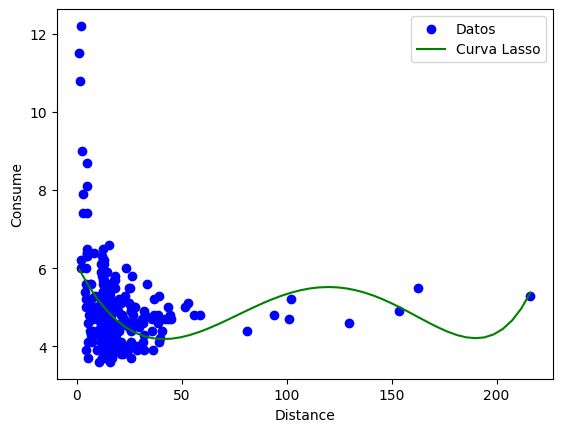

In [10]:
lasso = Lasso(alpha=0.1)  # 'alpha' controla la penalización, ajusta el valor según lo necesites
lasso.fit(X_, y_train)

# Coeficientes estimados
valores_opt_lasso = lasso.coef_
intercepto_lasso = lasso.intercept_

print(f"Coeficientes Lasso: {valores_opt_lasso}")
print(f"Intercepto Lasso: {intercepto_lasso}")

# Estimación de los valores dependientes utilizando el modelo ajustado
y_estimado_lasso = lasso.predict(X_)

# Cálculo del Error Cuadrático Medio
ecm_lasso = np.mean((y_train.values - y_estimado_lasso)**2)
print(f"Error Cuadrático Medio Lasso = {ecm_lasso}")

# Gráfico de dispersión y curva ajustada
y_line_lasso = lasso.predict(X_line)  # Predicción de los valores para la recta ajustada

# Gráfico
plt.scatter(x_train, y_train, color="blue", label="Datos")
plt.plot(x_line, y_line_lasso, color="green", label="Curva Lasso")
plt.xlabel("Distance")
plt.ylabel("Consume")
plt.legend()
plt.show()